In [ ]:
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler, MinMaxScaler, Normalizer, RobustScaler
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score, train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegressionCV, SGDClassifier
from sklearn.metrics import confusion_matrix,accuracy_score
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import silhouette_score, adjusted_rand_score
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans
from sklearn.metrics import accuracy_score
import xgboost as xgb

%matplotlib inline

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Splitting data frame

In [ ]:
df = pd.read_csv("/content/drive/MyDrive/train.csv")
test_data, train_data = train_test_split(df)

In [ ]:
train_data.head()

,ID,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1,Segmentation
4615,466715,Male,Yes,72,Yes,Executive,1.0,High,4.0,Cat_6,C
3735,461707,Female,Yes,45,Yes,Artist,1.0,Average,4.0,Cat_6,C
6542,466201,Male,Yes,42,Yes,Doctor,1.0,Average,5.0,Cat_4,C
1846,461313,Male,Yes,57,Yes,Artist,1.0,Average,NaN,Cat_6,C
7208,460268,Male,Yes,32,Yes,Artist,9.0,Average,2.0,Cat_6,B


In [ ]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2017 entries, 4615 to 5675
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ID               2017 non-null   int64  
 1   Gender           2017 non-null   object 
 2   Ever_Married     1979 non-null   object 
 3   Age              2017 non-null   int64  
 4   Graduated        1994 non-null   object 
 5   Profession       1983 non-null   object 
 6   Work_Experience  1816 non-null   float64
 7   Spending_Score   2017 non-null   object 
 8   Family_Size      1934 non-null   float64
 9   Var_1            2005 non-null   object 
 10  Segmentation     2017 non-null   object 
dtypes: float64(2), int64(2), object(7)
memory usage: 189.1+ KB


In [ ]:
train_data.describe()

,ID,Age,Work_Experience,Family_Size
count,2017.000000,2017.000000,1816.000000,1934.000000
mean,463563.761527,43.647992,2.651432,2.825750
std,2618.755086,16.483759,3.473184,1.528531
min,458987.000000,18.000000,0.000000,1.000000
25%,461332.000000,31.000000,0.000000,2.000000
50%,463576.000000,41.000000,1.000000,2.000000
75%,465874.000000,53.000000,4.000000,4.000000
max,467973.000000,89.000000,14.000000,9.000000


In [ ]:
cols_name = list(train_data.columns)
cols_name

['ID',
 'Gender',
 'Ever_Married',
 'Age',
 'Graduated',
 'Profession',
 'Work_Experience',
 'Spending_Score',
 'Family_Size',
 'Var_1',
 'Segmentation']

In [ ]:
for name in cols_name:
    print(f"{name}:{train_data[name].nunique()} | dtype:{train_data[name].dtype} | values:{train_data[name].unique()}|\n")

ID:2017 | dtype:int64 | values:[466715 461707 466201 ... 461426 464594 464985]|

Gender:2 | dtype:object | values:['Male' 'Female']|

Ever_Married:2 | dtype:object | values:['Yes' nan 'No']|

Age:67 | dtype:int64 | values:[72 45 42 57 32 33 29 47 37 60 41 39 30 88 84 40 26 80 35 50 27 20 66 69
 75 19 18 43 51 36 31 21 38 48 52 63 55 23 28 46 73 68 62 22 76 89 59 25
 81 83 65 79 49 56 71 86 61 58 53 74 77 82 70 67 87 85 78]|

Graduated:2 | dtype:object | values:['Yes' 'No' nan]|

Profession:9 | dtype:object | values:['Executive' 'Artist' 'Doctor' 'Healthcare' 'Entertainment' 'Lawyer'
 'Engineer' 'Homemaker' 'Marketing' nan]|

Work_Experience:15 | dtype:float64 | values:[ 1.  9.  2. 13.  0.  3. nan  8. 12.  7.  4.  6.  5. 14. 10. 11.]|

Spending_Score:3 | dtype:object | values:['High' 'Average' 'Low']|

Family_Size:9 | dtype:float64 | values:[ 4.  5. nan  2.  1.  3.  9.  6.  8.  7.]|

Var_1:7 | dtype:object | values:['Cat_6' 'Cat_4' 'Cat_2' 'Cat_3' 'Cat_1' 'Cat_7' 'Cat_5' nan]|

Segmenta

<Axes: >

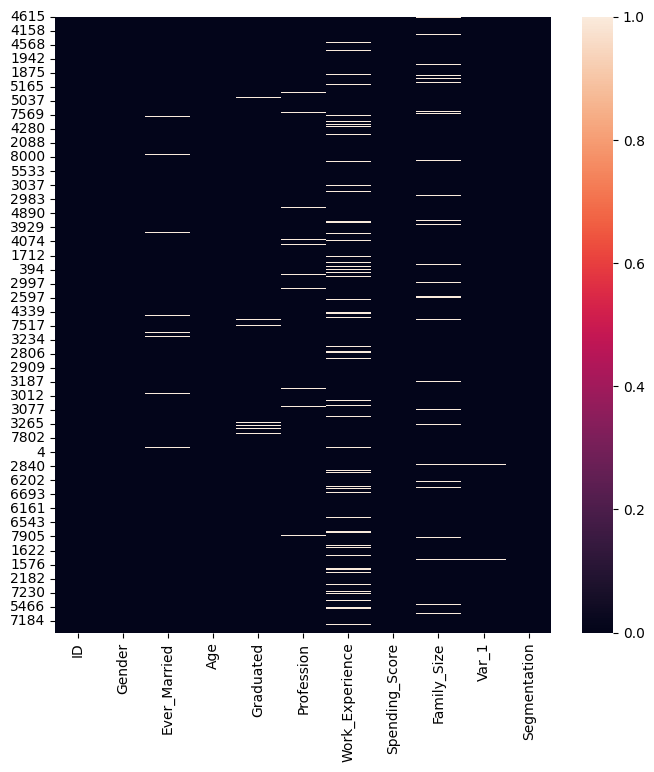

In [ ]:
#heat map visualization for missing values
fig, ax = plt.subplots(figsize=(8,8))
sns.heatmap(train_data.isna())

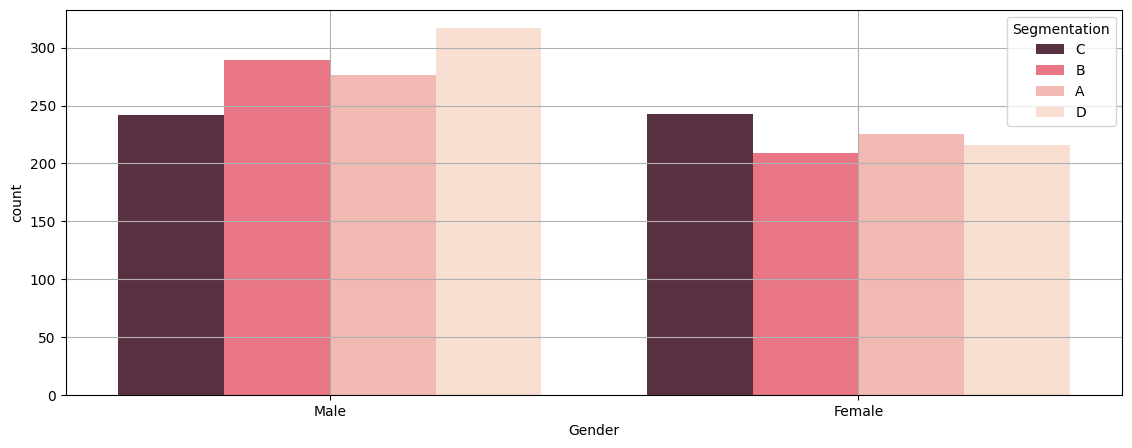

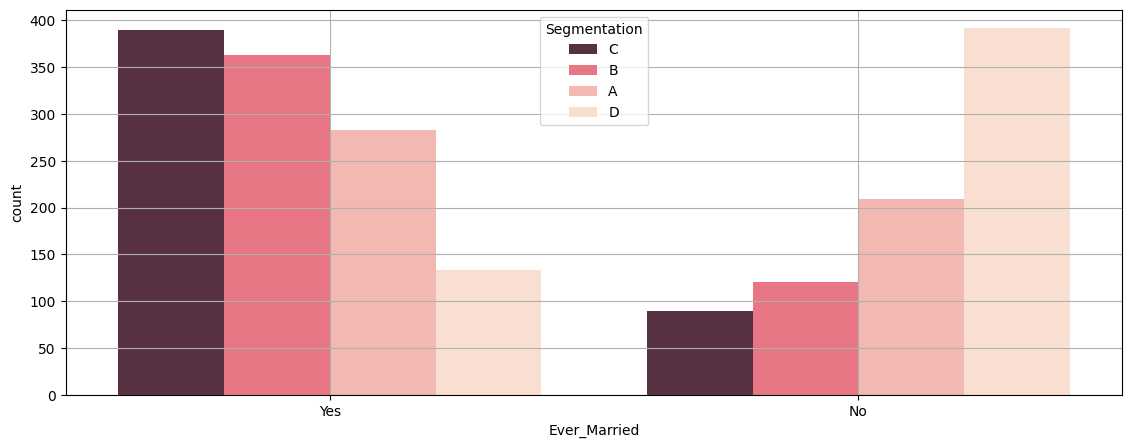

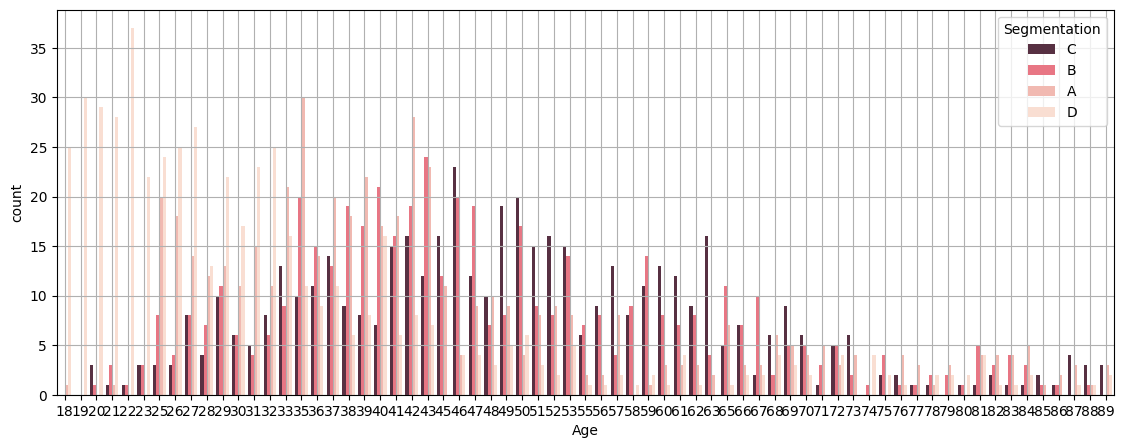

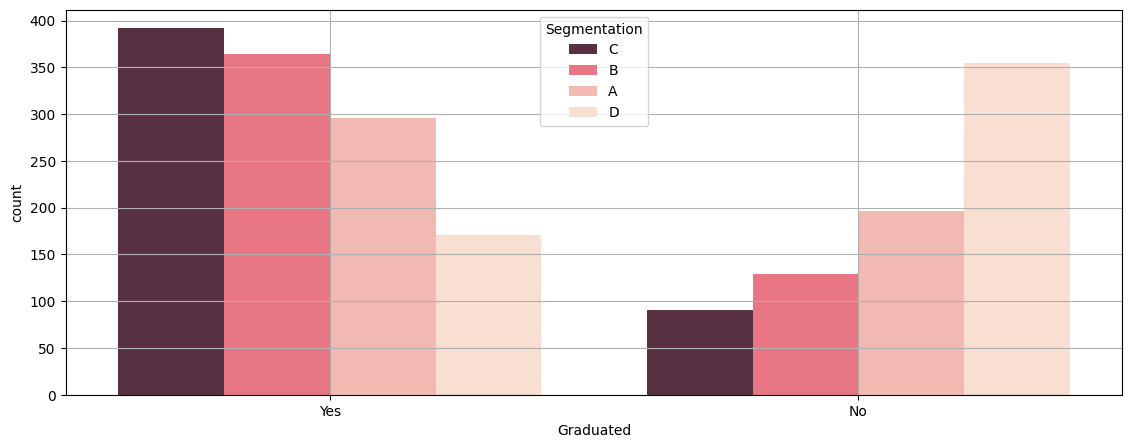

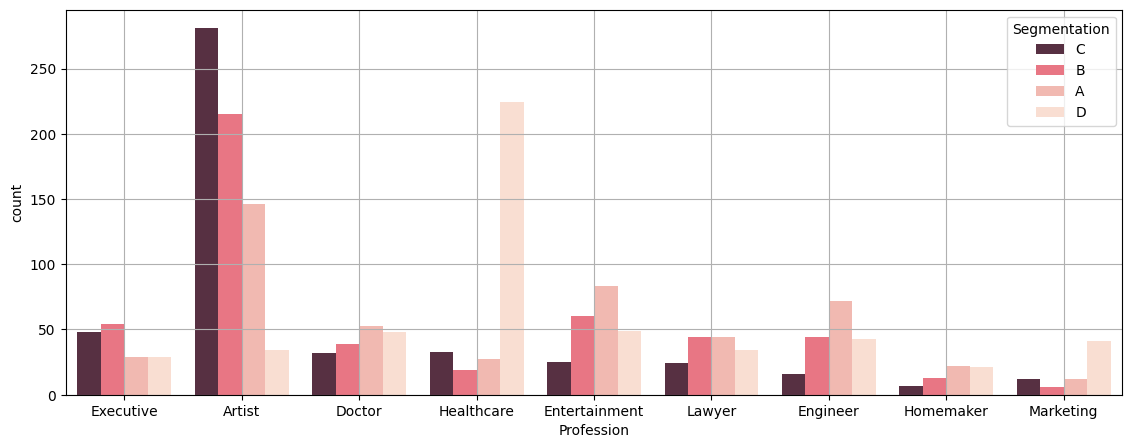

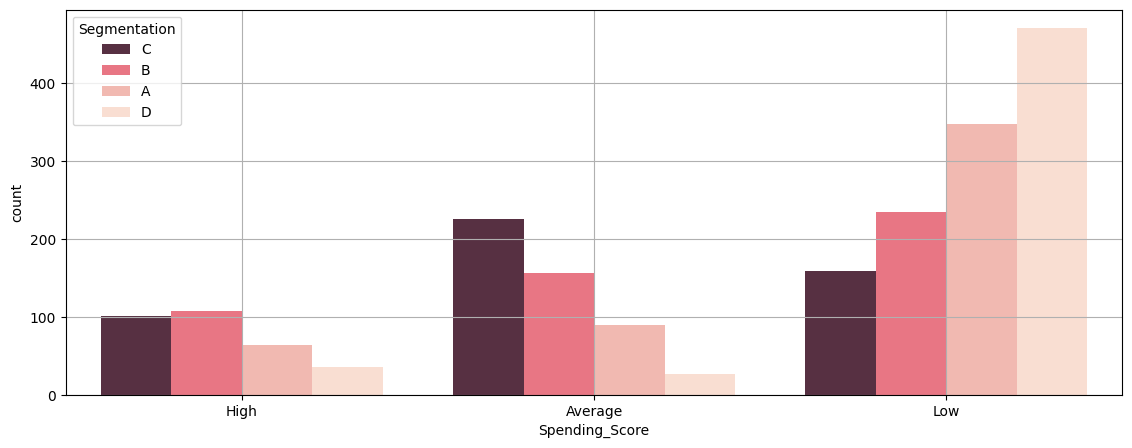

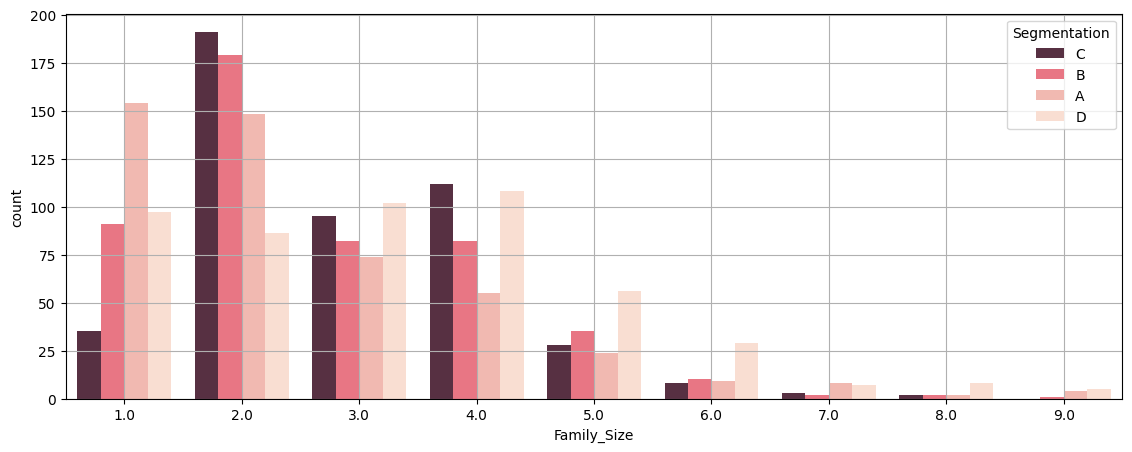

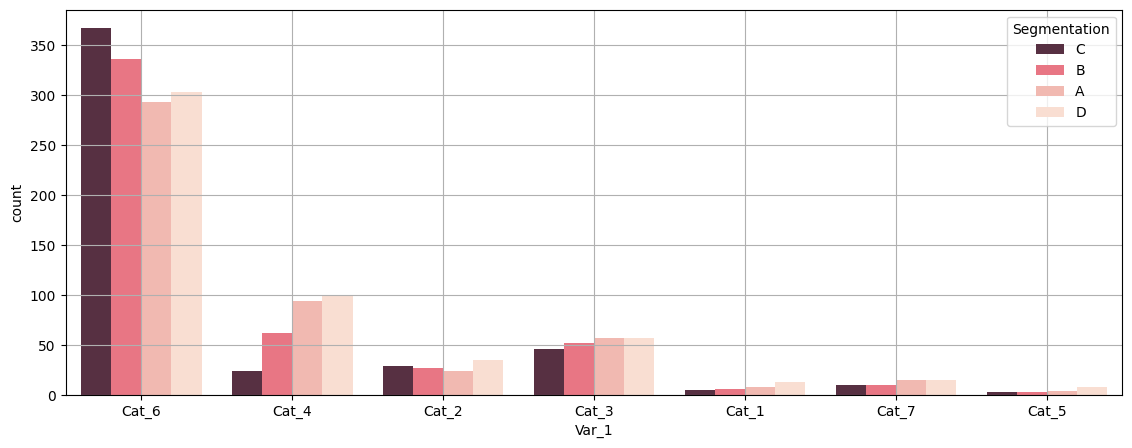

In [ ]:
#seaborn
plt.figure(figsize=(30,23))
plt.subplot(4,2,1)
sns.countplot(x='Gender',hue='Segmentation',data=train_data, palette=['#5D2A42',"#FB6376",'#FCB1A6',"#FFDCCC"])
plt.grid(True)

plt.figure(figsize=(30,23))
plt.subplot(4,2,1)
sns.countplot(x='Ever_Married',hue='Segmentation',data=train_data, palette=['#5D2A42',"#FB6376",'#FCB1A6',"#FFDCCC"])
plt.grid(True)

plt.figure(figsize=(30,23))
plt.subplot(4,2,1)
sns.countplot(x='Age',hue='Segmentation',data=train_data, palette=['#5D2A42',"#FB6376",'#FCB1A6',"#FFDCCC"])
plt.grid(True)

plt.figure(figsize=(30,23))
plt.subplot(4,2,1)
sns.countplot(x='Graduated',hue='Segmentation',data=train_data, palette=['#5D2A42',"#FB6376",'#FCB1A6',"#FFDCCC"])
plt.grid(True)

plt.figure(figsize=(30,23))
plt.subplot(4,2,1)
sns.countplot(x='Profession',hue='Segmentation',data=train_data, palette=['#5D2A42',"#FB6376",'#FCB1A6',"#FFDCCC"])
plt.grid(True)

plt.figure(figsize=(30,23))
plt.subplot(4,2,1)
sns.countplot(x='Spending_Score',hue='Segmentation',data=train_data, palette=['#5D2A42',"#FB6376",'#FCB1A6',"#FFDCCC"])
plt.grid(True)

plt.figure(figsize=(30,23))
plt.subplot(4,2,1)
sns.countplot(x='Family_Size',hue='Segmentation',data=train_data, palette=['#5D2A42',"#FB6376",'#FCB1A6',"#FFDCCC"])
plt.grid(True)

plt.figure(figsize=(30,23))
plt.subplot(4,2,1)
sns.countplot(x='Var_1',hue='Segmentation',data=train_data, palette=['#5D2A42',"#FB6376",'#FCB1A6',"#FFDCCC"])
plt.grid(True)

In [ ]:
train_data.groupby("Segmentation")["Gender"].value_counts(normalize=True).round(3).unstack()

Gender,Female,Male
Segmentation,,
A,0.449,0.551
B,0.420,0.580
C,0.501,0.499
D,0.405,0.595


In [ ]:
train_data.groupby("Segmentation")["Spending_Score"].value_counts(normalize=True).round(3).unstack()

Spending_Score,Average,High,Low
Segmentation,,,
A,0.178,0.128,0.695
B,0.313,0.215,0.472
C,0.464,0.208,0.328
D,0.049,0.068,0.884


In [ ]:
train_data.groupby("Segmentation")["Ever_Married"].value_counts(normalize=True).round(3).unstack()

Ever_Married,No,Yes
Segmentation,,
A,0.425,0.575
B,0.248,0.752
C,0.186,0.814
D,0.747,0.253


In [ ]:
train_data.groupby("Segmentation")["Graduated"].value_counts(normalize=True).round(3).unstack()

Graduated,No,Yes
Segmentation,,
A,0.398,0.602
B,0.262,0.738
C,0.188,0.812
D,0.675,0.325


In [ ]:
train_data.groupby("Segmentation")["Profession"].value_counts(normalize=True).round(3).unstack()

Profession,Artist,Doctor,Engineer,Entertainment,Executive,Healthcare,Homemaker,Lawyer,Marketing
Segmentation,,,,,,,,,
A,0.299,0.109,0.148,0.170,0.059,0.055,0.045,0.090,0.025
B,0.435,0.079,0.089,0.121,0.109,0.038,0.026,0.089,0.012
C,0.588,0.067,0.033,0.052,0.100,0.069,0.015,0.050,0.025
D,0.065,0.092,0.082,0.094,0.055,0.428,0.040,0.065,0.078


In [ ]:
train_data.groupby("Segmentation")["Family_Size"].value_counts(normalize=True).round(3).unstack()

Family_Size,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0
Segmentation,,,,,,,,,
A,0.322,0.310,0.155,0.115,0.050,0.019,0.017,0.004,0.008
B,0.188,0.370,0.169,0.169,0.072,0.021,0.004,0.004,0.002
C,0.074,0.403,0.200,0.236,0.059,0.017,0.006,0.004,NaN
D,0.195,0.173,0.205,0.217,0.112,0.058,0.014,0.016,0.010


In [ ]:
train_data.groupby("Segmentation")["Var_1"].value_counts(normalize=True).round(3).unstack()

Var_1,Cat_1,Cat_2,Cat_3,Cat_4,Cat_5,Cat_6,Cat_7
Segmentation,,,,,,,
A,0.016,0.048,0.115,0.190,0.008,0.592,0.030
B,0.012,0.054,0.105,0.125,0.006,0.677,0.020
C,0.010,0.060,0.095,0.050,0.006,0.758,0.021
D,0.025,0.066,0.108,0.187,0.015,0.572,0.028


<Axes: xlabel='Segmentation', ylabel='count'>

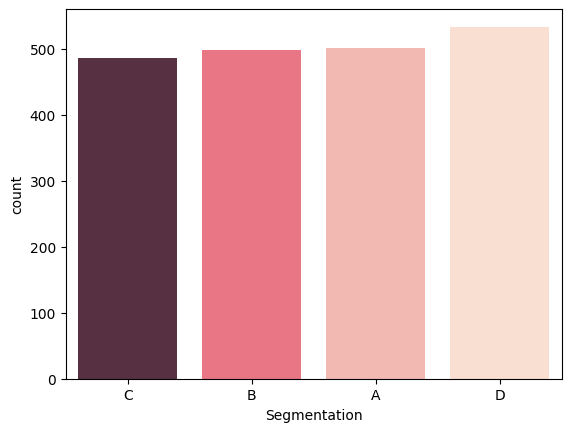

In [ ]:
sns.countplot(x='Segmentation',data=train_data, palette=['#5D2A42',"#FB6376",'#FCB1A6',"#FFDCCC"])

In [ ]:
#function to fill nulls with mode if data is categorical, and median if continous.
def fill_na(df):
    col=df.columns
    for c in col:
        if(df[c].dtypes == object):
            df[c].fillna(df[c].mode()[0],inplace=True)
        elif (df[c].dtypes ==float):
            df[c].fillna(df[c].median(),inplace=True)

In [ ]:
train_data.isna().sum()

ID                   0
Gender               0
Ever_Married        38
Age                  0
Graduated           23
Profession          34
Work_Experience    201
Spending_Score       0
Family_Size         83
Var_1               12
Segmentation         0
dtype: int64

In [ ]:
fill_na(train_data)

In [ ]:
train_data.isna().sum()

ID                 0
Gender             0
Ever_Married       0
Age                0
Graduated          0
Profession         0
Work_Experience    0
Spending_Score     0
Family_Size        0
Var_1              0
Segmentation       0
dtype: int64

<Axes: >

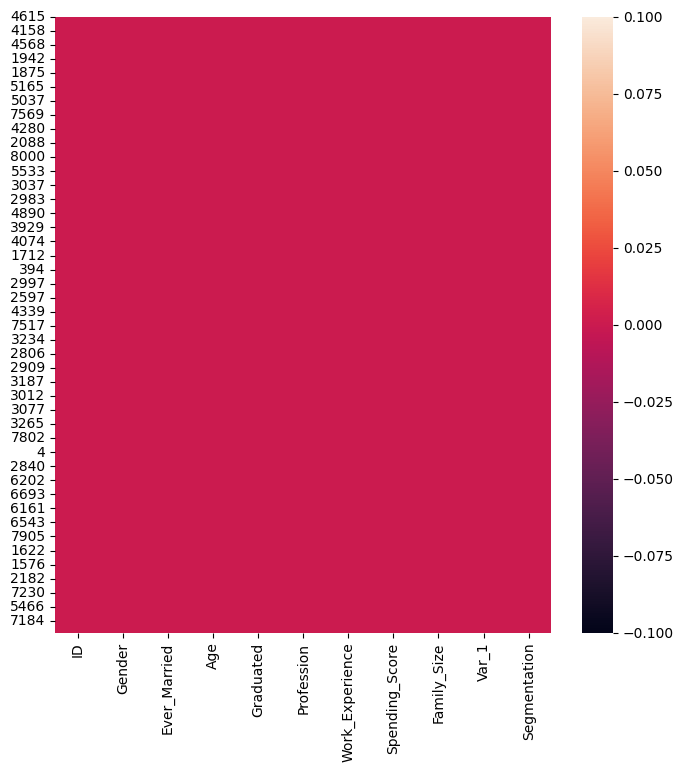

In [ ]:
fig, ax = plt.subplots(figsize=(8,8))
sns.heatmap(train_data.isna())

In [ ]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2017 entries, 4615 to 5675
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ID               2017 non-null   int64  
 1   Gender           2017 non-null   object 
 2   Ever_Married     2017 non-null   object 
 3   Age              2017 non-null   int64  
 4   Graduated        2017 non-null   object 
 5   Profession       2017 non-null   object 
 6   Work_Experience  2017 non-null   float64
 7   Spending_Score   2017 non-null   object 
 8   Family_Size      2017 non-null   float64
 9   Var_1            2017 non-null   object 
 10  Segmentation     2017 non-null   object 
dtypes: float64(2), int64(2), object(7)
memory usage: 189.1+ KB


In [ ]:
for name in cols_name:
    print(f"{name}:{train_data[name].nunique()} | dtype:{train_data[name].dtype} | values:{train_data[name].unique()}|\n")

ID:2017 | dtype:int64 | values:[466715 461707 466201 ... 461426 464594 464985]|

Gender:2 | dtype:object | values:['Male' 'Female']|

Ever_Married:2 | dtype:object | values:['Yes' 'No']|

Age:67 | dtype:int64 | values:[72 45 42 57 32 33 29 47 37 60 41 39 30 88 84 40 26 80 35 50 27 20 66 69
 75 19 18 43 51 36 31 21 38 48 52 63 55 23 28 46 73 68 62 22 76 89 59 25
 81 83 65 79 49 56 71 86 61 58 53 74 77 82 70 67 87 85 78]|

Graduated:2 | dtype:object | values:['Yes' 'No']|

Profession:9 | dtype:object | values:['Executive' 'Artist' 'Doctor' 'Healthcare' 'Entertainment' 'Lawyer'
 'Engineer' 'Homemaker' 'Marketing']|

Work_Experience:15 | dtype:float64 | values:[ 1.  9.  2. 13.  0.  3.  8. 12.  7.  4.  6.  5. 14. 10. 11.]|

Spending_Score:3 | dtype:object | values:['High' 'Average' 'Low']|

Family_Size:9 | dtype:float64 | values:[4. 5. 2. 1. 3. 9. 6. 8. 7.]|

Var_1:7 | dtype:object | values:['Cat_6' 'Cat_4' 'Cat_2' 'Cat_3' 'Cat_1' 'Cat_7' 'Cat_5']|

Segmentation:4 | dtype:object | values:['

In [ ]:
#converting categorical data to numerical data
label_encoder=preprocessing.LabelEncoder()
ord_encoder=preprocessing.OrdinalEncoder()

In [ ]:
label_encoder.fit(train_data['Ever_Married'])
ord_encoder.fit(train_data[['Spending_Score']])

OrdinalEncoder()

In [ ]:
spend_map = {'Low':0, 'Average':1, 'High':2}
train_data.replace({"Spending_Score": spend_map}, inplace=True)
train_data.head()

,ID,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1,Segmentation
4615,466715,Male,Yes,72,Yes,Executive,1.0,2,4.0,Cat_6,C
3735,461707,Female,Yes,45,Yes,Artist,1.0,1,4.0,Cat_6,C
6542,466201,Male,Yes,42,Yes,Doctor,1.0,1,5.0,Cat_4,C
1846,461313,Male,Yes,57,Yes,Artist,1.0,1,2.0,Cat_6,C
7208,460268,Male,Yes,32,Yes,Artist,9.0,1,2.0,Cat_6,B


In [ ]:
train_data['Ever_Married'] = label_encoder.fit_transform(train_data['Ever_Married'])
train_data['Graduated'] = label_encoder.fit_transform(train_data['Graduated'])

In [ ]:
train_data['Gender'] = label_encoder.fit_transform(train_data['Gender'])
train_data['Profession'] = label_encoder.fit_transform(train_data['Profession'])
train_data['Var_1'] = label_encoder.fit_transform(train_data['Var_1'])
train_data['Spending_Score'] = label_encoder.fit_transform(train_data['Spending_Score'])
train_data.head()

,ID,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1,Segmentation
4615,466715,1,1,72,1,4,1.0,2,4.0,5,C
3735,461707,0,1,45,1,0,1.0,1,4.0,5,C
6542,466201,1,1,42,1,1,1.0,1,5.0,3,C
1846,461313,1,1,57,1,0,1.0,1,2.0,5,C
7208,460268,1,1,32,1,0,9.0,1,2.0,5,B


In [ ]:
train_data.duplicated().sum()

0

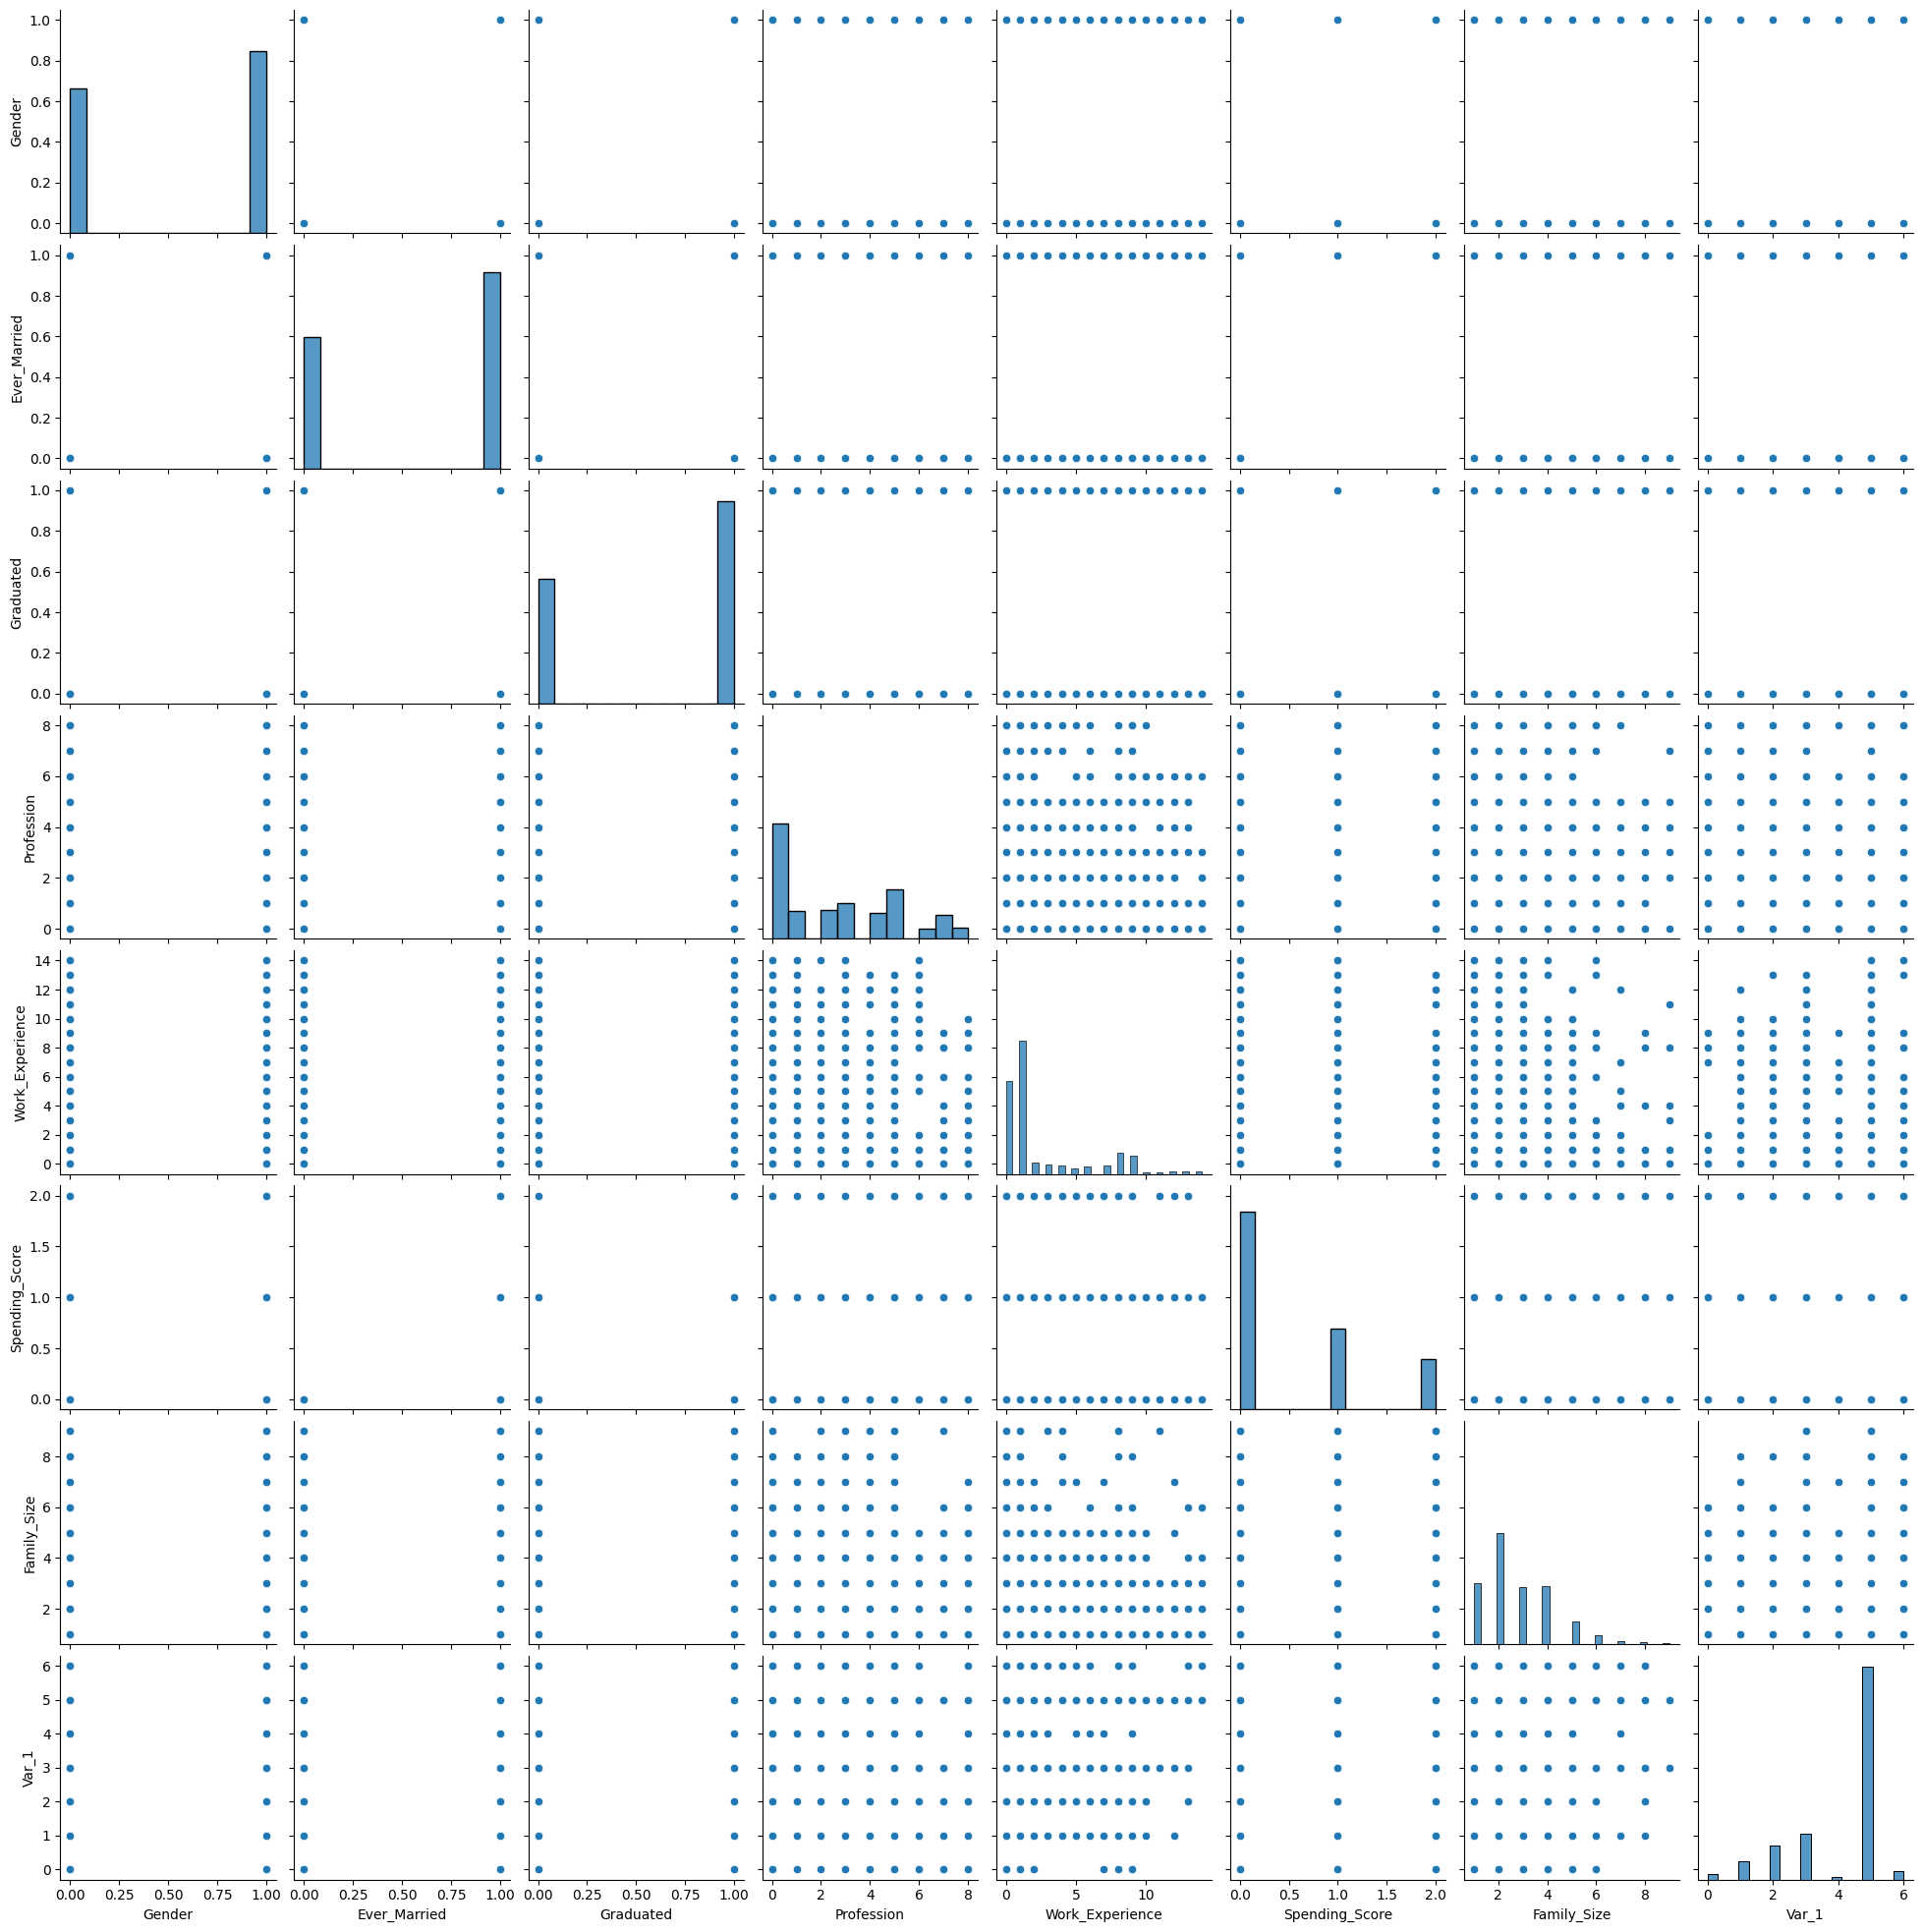

In [ ]:
sns.pairplot(train_data[['Gender','Ever_Married','Graduated','Profession','Work_Experience','Spending_Score','Family_Size','Var_1','Segmentation']])

In [ ]:
print(train_data['Age'].min())
print(train_data['Age'].max())

18
89


In [ ]:
train_data.head()

,ID,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1,Segmentation
4615,466715,1,1,72,1,4,1.0,2,4.0,5,C
3735,461707,0,1,45,1,0,1.0,1,4.0,5,C
6542,466201,1,1,42,1,1,1.0,1,5.0,3,C
1846,461313,1,1,57,1,0,1.0,1,2.0,5,C
7208,460268,1,1,32,1,0,9.0,1,2.0,5,B


In [ ]:
train_data['Segmentation'].unique()

array(['C', 'B', 'A', 'D'], dtype=object)

In [ ]:
train_data['Segmentation'].replace({'A':0,'B':1,'C':2,'D':3}, inplace=True)
train_data.head()

,ID,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1,Segmentation
4615,466715,1,1,72,1,4,1.0,2,4.0,5,2
3735,461707,0,1,45,1,0,1.0,1,4.0,5,2
6542,466201,1,1,42,1,1,1.0,1,5.0,3,2
1846,461313,1,1,57,1,0,1.0,1,2.0,5,2
7208,460268,1,1,32,1,0,9.0,1,2.0,5,1


In [ ]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2017 entries, 4615 to 5675
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ID               2017 non-null   int64  
 1   Gender           2017 non-null   int64  
 2   Ever_Married     2017 non-null   int64  
 3   Age              2017 non-null   int64  
 4   Graduated        2017 non-null   int64  
 5   Profession       2017 non-null   int64  
 6   Work_Experience  2017 non-null   float64
 7   Spending_Score   2017 non-null   int64  
 8   Family_Size      2017 non-null   float64
 9   Var_1            2017 non-null   int64  
 10  Segmentation     2017 non-null   int64  
dtypes: float64(2), int64(9)
memory usage: 189.1 KB


<Axes: >

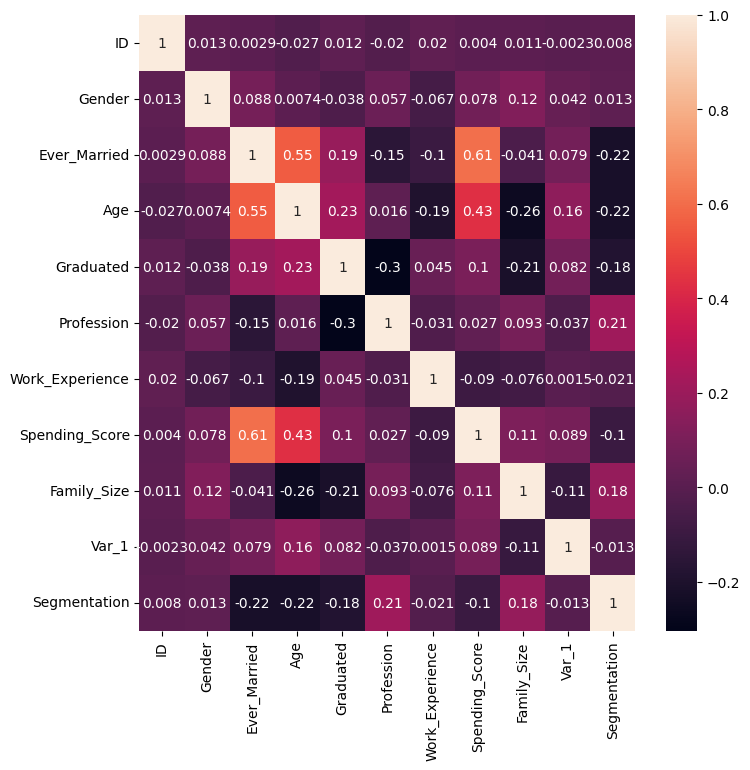

In [ ]:
fig, ax = plt.subplots(figsize=(8,8))

sns.heatmap(train_data.corr(),annot=True)

In [ ]:
train_data.drop(['Age'], axis=1, inplace=True)

In [ ]:
def make_confusion_matrix(model, X_local, y_local, threshold=0.5):
    # Predict class 1 if probability of being in class 1 is greater than threshold
    # (model.predict(X_test) does this automatically with a threshold of 0.5)
    y_predict = model.predict(X_local)
    fraud_confusion = confusion_matrix(y_local, y_predict)
    plt.figure(dpi=80)
    sns.heatmap(fraud_confusion, cmap=plt.cm.Blues, annot=True, square=True, fmt='d');
    plt.xlabel('prediction')
    plt.ylabel('actual')

def make_class_report(model, X_local, y_local, threshold=0.5):
    # Predict class 1 if probability of being in class 1 is greater than threshold
    # (model.predict(X_test) does this automatically with a threshold of 0.5)
    y_predict = model.predict(X_local)
    print(classification_report(y_local, y_predict))

In [ ]:
X = train_data.drop('Segmentation', axis=1)
y = train_data['Segmentation']
print(X)

          ID  Gender  Ever_Married  Graduated  Profession  Work_Experience  \
4615  466715       1             1          1           4              1.0   
3735  461707       0             1          1           0              1.0   
6542  466201       1             1          1           1              1.0   
1846  461313       1             1          1           0              1.0   
7208  460268       1             1          1           0              9.0   
...      ...     ...           ...        ...         ...              ...   
5309  460850       0             1          0           2              0.0   
5444  463976       0             0          0           5              5.0   
1685  461426       1             1          1           0              7.0   
7147  464594       1             1          1           0              1.0   
5675  464985       0             1          1           7              1.0   

      Spending_Score  Family_Size  Var_1  
4615               2

In [ ]:
num_list = X.select_dtypes(include=np.number).columns
cat_list = X.select_dtypes(exclude=np.number).columns

In [ ]:
print(num_list)
print(cat_list)

Index(['ID', 'Gender', 'Ever_Married', 'Graduated', 'Profession',
       'Work_Experience', 'Spending_Score', 'Family_Size', 'Var_1'],
      dtype='object')
Index([], dtype='object')


In [ ]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=13)
print(X_train)

          ID  Gender  Ever_Married  Graduated  Profession  Work_Experience  \
4392  459371       1             1          1           0              1.0   
3154  462386       0             0          1           5              1.0   
3830  466485       1             1          1           4              9.0   
3055  467555       1             0          0           3             14.0   
5533  460029       0             1          1           5             12.0   
...      ...     ...           ...        ...         ...              ...   
686   465361       1             0          0           5              0.0   
5133  462832       0             0          0           1              1.0   
6777  461470       1             1          1           0              2.0   
1263  465014       1             1          0           7              1.0   
4050  463243       1             0          0           5              0.0   

      Spending_Score  Family_Size  Var_1  
4392               0

In [ ]:
#the 10000 iteration is to help the model converge
lr = LogisticRegression(max_iter=2000,random_state=100)

In [ ]:
lr.fit(X_train[num_list],y_train)
y_pred = lr.predict(X_train[num_list])
lr.score(X_train[num_list],y_train)

0.26782393056416615

In [ ]:
lr.score(X_val[num_list],y_val)

0.25

In [ ]:
from sklearn.tree import DecisionTreeClassifier
dtree_model = DecisionTreeClassifier(criterion= 'entropy', max_depth=8, max_leaf_nodes=32, min_samples_split= 2)
dtree_model.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=8, max_leaf_nodes=32)

In [ ]:
print(f' training accuracy: {dtree_model.score(X_train,y_train)}')
print(f' validation accuracy: {dtree_model.score(X_val,y_val)}')

 training accuracy: 0.5282083075015499
 validation accuracy: 0.47277227722772275


In [ ]:
from sklearn.svm import SVC

svm_clf = SVC(probability=True,gamma="auto", random_state=42)
svm_clf.fit(X_train, y_train)
print(svm_clf.score(X_train, y_train))
print(svm_clf.score(X_val, y_val))

0.9987600743955363
0.29455445544554454


In [ ]:
X_train_prediction = svm_clf.predict(X_train)
training_data_accuracy=accuracy_score(X_train_prediction,y_train)

In [ ]:
print("Accuracy score of trainiing data using SVC:",training_data_accuracy)

Accuracy score of trainiing data using SVC: 0.9987600743955363


In [ ]:
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()
train_data['Profession']= label_encoder.fit_transform(train_data['Profession'])
train_data['Profession']

4615    4
3735    0
6542    1
1846    0
7208    0
       ..
5309    2
5444    5
1685    0
7147    0
5675    7
Name: Profession, Length: 2017, dtype: int64

In [ ]:
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()
train_data['Var_1']= label_encoder.fit_transform(train_data['Var_1'])
train_data['Var_1']

4615    5
3735    5
6542    3
1846    5
7208    5
       ..
5309    5
5444    3
1685    5
7147    1
5675    5
Name: Var_1, Length: 2017, dtype: int64

In [ ]:
X = train_data.drop('Segmentation', axis=1)
y = train_data['Segmentation']
print(X)

          ID  Gender  Ever_Married  Graduated  Profession  Work_Experience  \
4615  466715       1             1          1           4              1.0   
3735  461707       0             1          1           0              1.0   
6542  466201       1             1          1           1              1.0   
1846  461313       1             1          1           0              1.0   
7208  460268       1             1          1           0              9.0   
...      ...     ...           ...        ...         ...              ...   
5309  460850       0             1          0           2              0.0   
5444  463976       0             0          0           5              5.0   
1685  461426       1             1          1           0              7.0   
7147  464594       1             1          1           0              1.0   
5675  464985       0             1          1           7              1.0   

      Spending_Score  Family_Size  Var_1  
4615               2

In [ ]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=13)
print(X_train)

          ID  Gender  Ever_Married  Graduated  Profession  Work_Experience  \
4392  459371       1             1          1           0              1.0   
3154  462386       0             0          1           5              1.0   
3830  466485       1             1          1           4              9.0   
3055  467555       1             0          0           3             14.0   
5533  460029       0             1          1           5             12.0   
...      ...     ...           ...        ...         ...              ...   
686   465361       1             0          0           5              0.0   
5133  462832       0             0          0           1              1.0   
6777  461470       1             1          1           0              2.0   
1263  465014       1             1          0           7              1.0   
4050  463243       1             0          0           5              0.0   

      Spending_Score  Family_Size  Var_1  
4392               0

In [ ]:
from sklearn.ensemble import RandomForestClassifier

clf=RandomForestClassifier(n_estimators=200, min_samples_leaf=6,oob_score=True, warm_start=True,
                           max_samples=int(X_train.shape[0]/2),random_state=25)
# clf=RandomForestClassifier()
clf.fit(X_train,y_train)
print(clf.score(X_train, y_train))
print(clf.score(X_val, y_val))

pred1 = clf.predict(X_val)
acc = accuracy_score(pred1,y_val)
print(acc)

0.6119032858028518
0.5074257425742574
0.5074257425742574


In [ ]:
clf=RandomForestClassifier(n_estimators=200, min_samples_leaf=6,oob_score=True, warm_start=True,
                           max_samples=int(X_train.shape[0]/2),random_state=25)

clf.fit(X,y)
import joblib
joblib.dump(clf,"seg")
model = joblib.load("seg")
pred = model.predict([[0,1,1,0,1,1,2,5,1]])
print(pred)

[1]


/usr/local/lib/python3.9/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


In [ ]:
if pred==0:
  print("A")
elif pred==1:
  print("B")
elif pred==2:
  print("C")
else:
  print("D")

B


In [ ]:
print(X_train)

          ID  Gender  Ever_Married  Graduated  Profession  Work_Experience  \
4392  459371       1             1          1           0              1.0   
3154  462386       0             0          1           5              1.0   
3830  466485       1             1          1           4              9.0   
3055  467555       1             0          0           3             14.0   
5533  460029       0             1          1           5             12.0   
...      ...     ...           ...        ...         ...              ...   
686   465361       1             0          0           5              0.0   
5133  462832       0             0          0           1              1.0   
6777  461470       1             1          1           0              2.0   
1263  465014       1             1          0           7              1.0   
4050  463243       1             0          0           5              0.0   

      Spending_Score  Family_Size  Var_1  
4392               0

In [ ]:
!pip install gradio

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import joblib
import gradio as gr

def customer_segmentation(Gender,Ever_Married,Age ,Graduated,Profession ,Work_Experience,Spending_score,Family_size,Var_1):
  model = joblib.load('seg')
  y_pred = model.predict([[Gender,Ever_Married,Age ,Graduated,Profession ,Work_Experience,Spending_score,Family_size,Var_1]])
  if y_pred==0:
    return "A"
  elif y_pred==1:
    return "B"
  elif y_pred==2:
    return "C"
  else:
    return "D"

inputs = [
    gr.inputs.Number(label="Gender"),
    gr.inputs.Number(label="Ever_Married"),
    gr.inputs.Number(label="Age"),
    gr.inputs.Number(label="Graduated"),
    gr.inputs.Number(label="Profession"),
    gr.inputs.Number(label="Work_Experience"),
    gr.inputs.Number(label="Spending_Score"),
    gr.inputs.Number(label="Family_Size"),
    gr.inputs.Number(label="Var_1")
    ]

output = gr.outputs.Textbox(label="Prediction")

interface = gr.Interface(fn=customer_segmentation, inputs=inputs, outputs=output, title="Customer segmentation for automobile")
interface.launch()

/usr/local/lib/python3.9/dist-packages/gradio/inputs.py:59: UserWarning: Usage of gradio.inputs is deprecated, and will not be supported in the future, please import your component from gradio.components
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/gradio/deprecation.py:40: UserWarning: `optional` parameter is deprecated, and it has no effect
  warnings.warn(value)
/usr/local/lib/python3.9/dist-packages/gradio/outputs.py:22: UserWarning: Usage of gradio.outputs is deprecated, and will not be supported in the future, please import your components from gradio.components
  warnings.warn(


Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
Note: opening Chrome Inspector may crash demo inside Colab notebooks.

To create a public link, set `share=True` in `launch()`.


<IPython.core.display.Javascript object>

In [ ]:
X_train_prediction = clf.predict(X_train)
training_data_accuracy=accuracy_score(X_train_prediction,y_train)

In [ ]:
print("Accuracy score of trainiing data using RandomForestClassifier:",training_data_accuracy)

Accuracy score of trainiing data using RandomForestClassifier: 0.5982641041537508


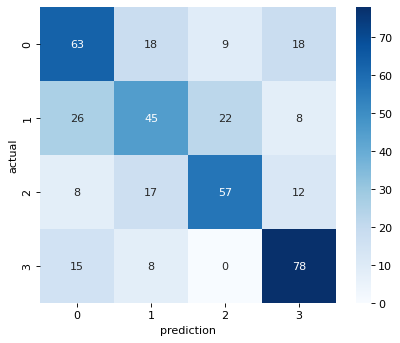

In [ ]:
make_confusion_matrix(clf,X_val, y_val)

In [ ]:
from sklearn.metrics import classification_report
make_class_report(clf,X_val, y_val)

              precision    recall  f1-score   support

           0       0.56      0.58      0.57       108
           1       0.51      0.45      0.48       101
           2       0.65      0.61      0.63        94
           3       0.67      0.77      0.72       101

    accuracy                           0.60       404
   macro avg       0.60      0.60      0.60       404
weighted avg       0.60      0.60      0.60       404

